In [26]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import fft
from PIL import Image

In [27]:
def pattern_recognition(pattern, img, save_name=""):
    img_img = Image.open(img).convert("L")
    img_array = np.array(img_img)*(-1) + 255
    img_fft = fft.fft2(img_array)

    pattern_img = Image.open(pattern).convert("L")
    pattern_array = np.array(pattern_img)*(-1) + 255
    pattern_fft = fft.fft2(pattern_array[::-1, ::-1], s=img_array.shape)

    convolution = np.abs(fft.ifft2(img_fft * pattern_fft))
    max_correlation = np.max(convolution)

    new_img = Image.open(img).convert('RGB')
    new_array = np.array(new_img)

    s, w = convolution.shape
    a, b = pattern_array.shape
    red = (255, 0, 0)

    for i in range(a, s):
        for j in range(b, w):
            if convolution[i, j] > 0.9 * max_correlation:
                for k in range(i, i - a, -1):
                    new_array[k, j] = red
                    new_array[k, j - b] = red

                for k in range(j, j - b, -1):
                    new_array[i, k] = red
                    new_array[i - a, k] = red

    display(Image.fromarray(new_array))

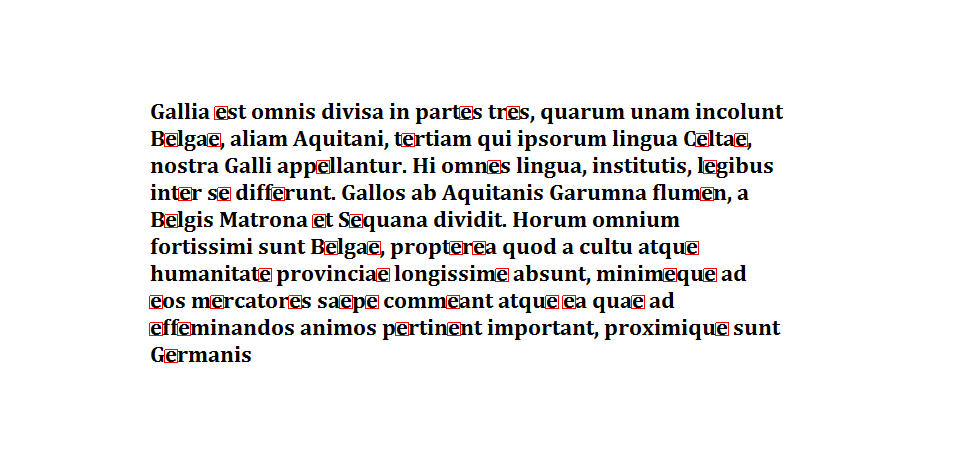

In [28]:
pattern_recognition('galia_e.png', 'galia.png')

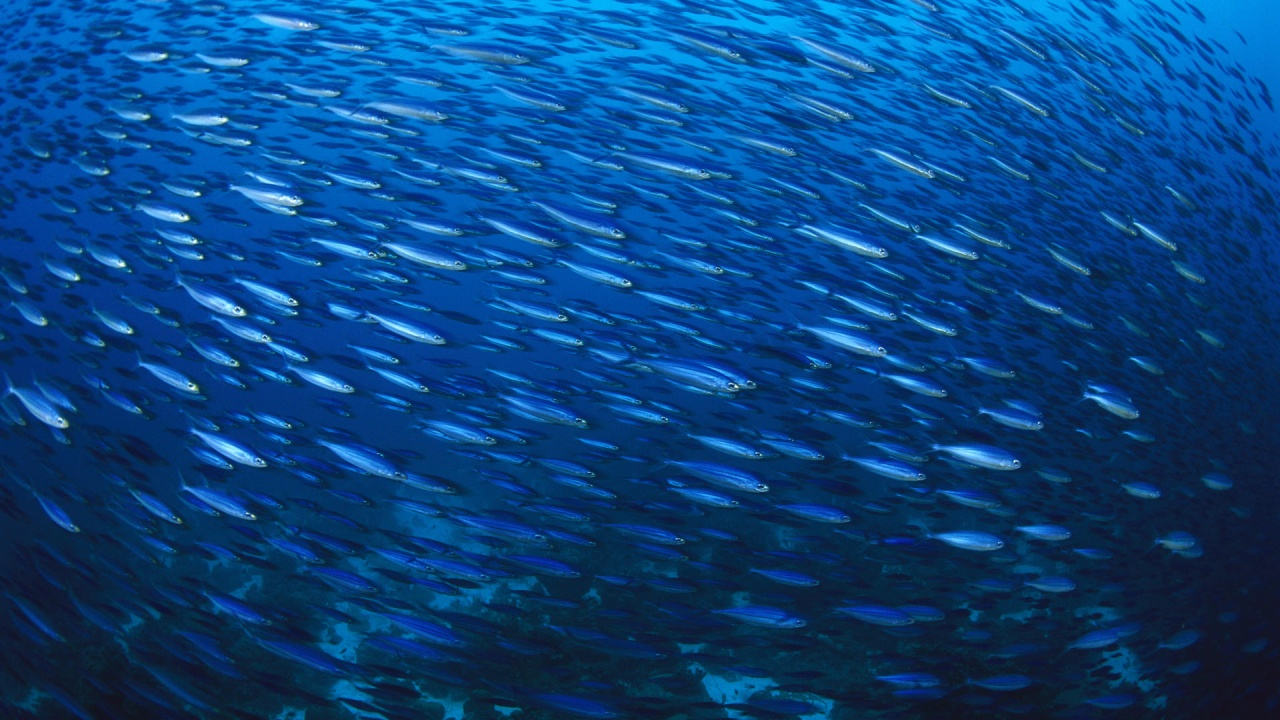

In [25]:
# pattern_recognition('fish1.png', 'school.jpg')